# Learning neural network stuff

# Neural Networks

## what is a input data?

It is a number that you recorded in the real world somewhere.

It is important that, the datapoints that you pass at the same time to the neural network depends on when you think that the neural network can be accurate with this data. 

Also we can put negative numbers in the data.

## what is a prediction?

A prediction is what the neural network tells you. It not always is right but it can learn from it. It can predict with multiple inputs and multiple outputs.

## what is a weight?

It is like the sensitive of the net. When you train the neural net it means to adjust the weights for have an accurate prediction how we can do it?

The objective of build a neural network is to compute a error function with a bunch of weight. Then you will have a relationship of the error and the weight of the network and with that information, you can change the weight to reduce the error to 0.

You will  use the alpha variable to reduce weight update so it doesn’t overshoot.

## Learning methods

Hot and cold: it consist on wiggling the weight to see when it reduce the error

gradient descent: it consist on to find the minimums error for learning.

Exists 3 gradient descent. When we talk about stochastic gradient descent, it updates the weights one example at the time. The full gradient descent, it updates one dataset at the time. Batch gradient descent, in this case you choose a batch size for updates the weight. 

## Overfitting

"Error is shared among all the weights. If a particular configuration of weights accidentally creates perfect correlation between the prediction and the output dataset without giving the heaviest weight to the best inputs, the neural network
will stop learnin". andrew trask

The greatest challenge is convincing my neural network to generalize instead of just memorize

## Backpropagation

It consist  on moving delta around to take a correlation of input and output. More technicaly it is about calculating deltas for intermediate layers for perform gradient descent 


## tips regularizations(ignore noise)

<ul>
    <li>neural networks find and create correlation</li>
    <li>stop training the NN when it getting worse to dont overfit</li>
    <li>
        use validation dataset for see when to stop train the neural net
    </li>
    <li>
        dropout: radomly turn off the neurons(set them to 0) during training (multiply the layer values by a random matrix of 1s and 0s)
    </li>
</ul>

## Correlation summarization

"Neural networks seek to find direct and indirect correlation between an input layer and an output layer, which are determined by the input 
and output datasets, respectively". andrew Trask

## Local Correlation summarization

"Any given set of weights optimizes to learn how to correlate its input layer with what the output layer says it should be." andrew Trask

## Global correlation summarization

"What an earlier layer says it should be can be determined by taking what a later layer says it should be and multiplying it by the weights in between them. This way, later layers can tell earlier layers what kind of signal they need, to ultimately find correlation with the output. This cross-communication is called backpropagation." andrew Trask

## notation

<ul>
    <li>
        I0W0: Take the layer 0 vector and perform vector-
        matrix multiplication with the weight matrix 0.”
    </li>
    <li>
        l1 = relu(l0W0): To create the layer 1 vector, take the layer 0 vector and perform vector-matrix multiplication with the weight matrix 0; then perform the relu function on the output (setting all negative numbers to 0).
    </li>
</ul>

# Activation Functions

It is a function applied to the neurons in a layer during the prediction.

## Constraints

<ul>
    <li>The function must be continuous and infinite in domain.</li>
    <li>Good activation functions are monotonic, never changing direction</li>
    <li>Good activation functions are nonlinear (they squiggle or turn)</li>
    <li>
        Good activation functions (and their derivatives) should be efficiently computable.
    </li>
</ul>

## Typical activation functions

## Sigmoid

![](/assets/images/sigmoid.png "sigmoid")

## tanh

It is better for hidden layers

![](/assets/images/tanh.png "tanh")

## softmax

for predict a single lable

![](/assets/images/softmax.png "softmax")

## typical configurations output layer

### configuration 1 Predicting raw data into values(no act function)

One case could be people want to train a neural network to transform one matrix into another where the range of output is something is a probability. It means we want the right answer no 0 or 1.

### configuration 2  predicting unrelated (yes/no) probabilities(sigmoid)

If we want to make multiple binary probabilities  in one neural network, it’s best to use the sigmoid activation function, because it models individual probabilities separately for each output node.

### configuration 3 predicting which-one probabilities(softmax) [chapter 9]

The most common use of neural networks is predicting a single label out of many. softmax asks, “Which digit seems like the best fit for this input?" softmax raises each input value exponentially and then
divides by the layer’s sum.




## overfitting

If a particular configuration of the weights accidentally creates a perfect correlation of the prediction and the output dataset without any noise, then the model is said to be overfitting. It means that the model is not general enough to generalize to new data. It will not learn just memorize.

## Backpropagation

backpropagation is about calculating delta values for each weight in intermediate layers for perform gradient descent.

In [ ]:
# tools that i will use

import numpy as np

In [ ]:
np.random.seed(1)

def relu(x):
    return (x > 0) * x

def relu2deriv(output): # this activates the ouputs necessary for the correlation
    return output > 0

streetlights = np.array([   [1, 0, 1], 
                            [0, 1, 1], 
                            [0, 0, 1],
                            [1, 1, 1]])

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T # goal prediction
alpha = 0.2
hidden_size = 4 # it means there is 4 nodes
weights_0_1 = 2 * np.random.random((3,hidden_size)) - 1
weights_1_2 = 2 * np.random.random((hidden_size,1)) - 1

# backpropagation
for iteration in range(50):
    error_layer_2 = 0

    for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error_layer_2 += np.sum((layer_2 - walk_vs_stop[i:i+1] ) ** 2)
        layer_2_delta = (layer_2 - walk_vs_stop[i:i+1])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)  # here happens de backpropagation

        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)

    if(iteration % 10 == 9):
        print("Error:" + str(error_layer_2))
    

## forward propagation

In [ ]:
# neural network with a single datapoint
def neural_network(input, weight):
    prediction = input * weight
    return prediction

weight = 0.1
data = [8.5, 9, 10, 4]
input = data[0]
neural_network(input,weight)


In [ ]:
# neural network with multiple inputs

def weight_sum(a,b):
    assert (len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]
    
    return output

def neural_network(input, weight):
    prediction = weight_sum(input, weight)
    return prediction


data1 = [8.5, 9.5, 9.9, 9.0]
data2 = [0.65, 0.8, 0.8, 0.9]
data3 = [1.2, 1.3, 0.5, 1.0]

input = [data1[0], data2[0], data3[0]];
weights = [0.1, 0.2, 0]

prediction = neural_network(input, weights)
print(prediction)

In [ ]:
# neural network with multiple inputs using numpy

import numpy as np

def neural_network(input, weights):
    prediction = input.dot(weights)
    return prediction

data1 = np.array([8.5, 9.5, 9.9, 9.0])
data2 = np.array([0.65, 0.8, 0.8, 0.9])
data3 = np.array([1.2, 1.3, 0.5, 1.0])
weights = np.array([0.1, 0.2, 0])
input = np.array([data1[0], data2[0], data3[0]])

prediction = neural_network(input, weights)
print(prediction)


In [ ]:
# neural networks with multiple outputs and one input

def mul(number, vector):
    output = [0,0,0]
    assert(len(output) == len(vector))

    for i in range(len(vector)):
        output[i] = number * vector[i]
    
    return output

def neural_network(input, weights):
    predictions = mul(input,weights)
    return prediction

data1 = [0.65, 0.8, 0.8, 0.9]
weight = [0.3, 0.2, 0.9]
input = data1[0]

prediction = neural_network(input, weight)
print(prediction)

In [ ]:
# a neural network with multiple inputs and ouputs
# it neural net has a hidden layer 

import numpy as np

def neural_network(input, weights):
    hidden_prediction = input.dot(weights[0])
    prediction = hidden_prediction.dot(weights[1])

    return prediction

input_to_hidden_weight = np.array([
                                [0.1, 0.2, -0.1],
                                [-0.1,0.1, 0.9],
                                [0.1, 0.4, 0.1]])

hidden_to_output_weight = np.array([
                                [0.3, 1.1, -0.3],
                                [0.1, 0.2, 0.0],
                                [0.0, 1.3, 0.1]])

weights = [input_to_hidden_weight, hidden_to_output_weight]

data1 = np.array([8.5, 9.5, 9.9, 9.0])
data2 = np.array([0.65,0.8, 0.8, 0.9])
data3 = np.array([1.2, 1.3, 0.5, 1.0])
input = np.array([data1[0],data2[0],data3[0]])

prediction = neural_network(input, weights)
print(prediction)

# Gradient Descent
How neural networks learn?

Learning means adjusting the weight to reduce the error to 0, one technique is using gradient descent.

In [ ]:
# ERROR OF A SINGLE NEURAL NETWORK 

weight = 0.5
input = 0.5
goal_prediction = 0.8

prediction = input * weight

error = (prediction - goal_prediction) ** 2 #this is a "pure error the "**2" force the error to be positive"
print(error)

: 

In [ ]:
# THE HOT AND COLD LEARNING

"""
some problems that have this method is:
    1- it is inefficient because you have to predict multiple times for a single weight
    2- sometimes it is possible to predict the goal_prediction good
"""
  
weight = 0.5
input = 0.5
goal_prediction = 0.8

step_amount = 0.001 # how much the weights are moving in an iteraction

for iteraction in range(1101):
    prediction = input * weight
    error = (prediction - goal_prediction) ** 2
    
    print("Error:" + str(error) + "Prediction:" + str(prediction))

    prediction_up = input * (weight + step_amount) # trying to move up
    error_up = (goal_prediction - prediction_up) ** 2

    prediction_down = input * (weight - step_amount) # trying to move down
    error_down = (goal_prediction - prediction_down) ** 2

    if (error_down < error_up):
        weight = weight - step_amount
    if (error_down > error_up):
        weight = weight + step_amount

In [ ]:
#  ONE SIMPLE GRADIENT DESCENT

weight = 0.5
goal_prediction = 0.8
input = 0.5

for iteraction in range(20):
    prediction = input * weight
    error = (prediction - goal_prediction) ** 2
    direction_and_amount = (prediction - goal_prediction) * input # this represents the sensitivity (the update of the weight) 
    weight = weight - direction_and_amount

    print("Error:" + str(error) + "Prediction:" + str(prediction))

In [ ]:
# A COMPLETE GRADIENT DESCENT
# play with it and change the variables you will find strange things

weight, goal_prediction, input = (1, 0.8, 5)  #with this input the neural network divergence

for iteration in range(4):
    print("------\nWeight:" + str(weight))
    
    prediction = input * weight
    error = (prediction - goal_prediction) ** 2 #absolute error
    delta = prediction - goal_prediction #delta Error
    weight_delta = delta * input 
    weight = weight - weight_delta #update of the weight reducing the delta

    print("Error:" + str(error) + "Prediction:" + str(prediction))
    print("Delta:" + str(delta) + "Weight Delta:" + str(weight_delta))

In [ ]:
# GRADIENDT DESCENT WITH ALPHA
# alpha prevent divergence

weight, goal_prediction, input, alpha = (0.5, 0.8, 2, 0.1)

for iteraction in range(20):
    print("------\nWeight:" + str(weight))

    prediction = input * weight
    error = (prediction - goal_prediction) ** 2
    delta = (prediction - goal_prediction)
    weight_delta = input * delta # devirative

    weight = weight - (weight_delta * alpha) #there is our alpha 
    
    print("Error:" + str(error) + "Prediction:" + str(prediction))
    print("Delta:" + str(delta) + "Weight Delta:" + str(weight_delta))


In [ ]:
# GRADIENT DESCENT WITH MULTIPLE INPUTS

def neural_network(input, weights):
    prediction = 0
    for i in range(len(input)):
        prediction += input[i] * weights[i]

    return prediction

def vector_multiplication(scalar, vector):
    output = [0,0,0]
    for i in range(len(output)):
        output[i] = vector[i] * scalar

    return output

#data
data1 = [8.5, 9.5, 9.9, 9.0]
data2 = [0.65, 0.8, 0.8, 0.9]
data3 = [1.2, 1.3, 0.5, 1.0]

goal_prediction = [1, 1, 0, 1]
first_goal = goal_prediction[0]

alpha= 0.1
weights = [0.1, 0.2, -.1]
input = [data1[0], data2[0], data3[0]]

#gradient descent
for iteraction in range(3):
    prediction = neural_network(input, weights)

    error = (prediction - first_goal) ** 2
    delta = (prediction - first_goal)

    weight_deltas = vector_multiplication(alpha, input) 

    print("Iteration:" + str(iteraction+1))
    print("Prediction:" + str(prediction))
    print("Error:" + str(error))
    print("Delta:" + str(delta))
    print("Weights:" + str(weights))
    print("Weight_Deltas:" + str(weight_deltas))
    print(" ")
    # update the weights
    for i in range(len(weights)):
        weights[i] -= alpha * weight_deltas[i] 

In [ ]:
# GRADIENT DESCENT WITH MULTIPLE OUTPUTS

def neural_network(input, weights):
    prediction = vector_multiplication(input, weights)

    return prediction

def vector_multiplication(scalar, vector):
    output = [0,0,0]

    assert(len(output) == len(vector))
    for i in range(len(output)):
        output[i] = vector[i] * scalar

    return output

#data
data = [8.5, 9.5, 9.9, 9.0]

goal_prediction1 = [0.1, 1, 0, 0.1]
goal_prediction2= [1, 1, 0, 1]
goal_prediction3 = [0.1, 0, 0.1, 0.2]

input = data[0]
first_goal = [goal_prediction1[0], goal_prediction2[0], goal_prediction3[0]]

error = [0,0,0]
delta = [0,0,0]
alpha = 0.1
weights = [0.3, 0.2, 0.9]

prediction = neural_network(input, weights)

for iteraction in range(3):
    for i in range(len(first_goal)):
        error[i] = (prediction[i] - first_goal[i]) ** 2
        delta[i] = prediction[i] - first_goal[i]

    weight_deltas = vector_multiplication(input, weights)

    for i in range(len(weights)):
        weights[i] -= weight_deltas[i] * alpha

    print("Iteraction:" + str(iteraction))
    print("Weights:" + str(weights))
    print("Weight Deltas:" + str(weight_deltas))
    print(" ")

In [ ]:
# GRADIENT DESCENT WITH MULTIPLE INPUTS AND OUTPUTS

def weight_sum(a,b):
    assert (len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]

def matrix_multiplication(vector, matrix):
    assert (len(vector) == len(matrix))
    output = [0,0,0]
    
    for i in range(len(vector)):
        output[i] = weight_sum(vector, matrix[i])
    
    return output

def neural_network(input, weights):
    prediction = matrix_multiplication(input, weights)

    return prediction

def product(vector_a, vector_b):
    output = [[0, 0, 0],[0, 0, 0], [0, 0, 0]]

    for i in range(3):
        for j in range(3):
            output[i][j] = vector_a[i] * vector_b[j]
    
    return output

# data

weights = [[0.1, 0.1, -0.3],[0.1, 0.2, 0.0], [0.0, 1.3, 0.1]]

data1 = [8.5, 9.5, 9.9, 9.0]
data2 = [0.65,0.8, 0.8, 0.9]
data3 = [1.2, 1.3, 0.5, 1.0]

goal_prediction1 = [0.1, 0.0, 0.0, 0.1]
goal_prediction2 = [1.0, 1.0, 0.0, 1.0]
goal_prediction3 = [0.1, 0.0, 0.1, 0.2]

alpha = 0.01

input = [data1[0], data2[0], data3[0]]
first_goal = [goal_prediction1[0], goal_prediction2[0], goal_prediction3[0]]

prediction = neural_network(input,weights)

error = [0,0,0]
delta = [0,0,0]

for i in range(len(first_goal)):
    error[i] = (prediction[i] - first_goal[i]) ** 2
    delta[i] = prediction[i] - first_goal[i]

weight_deltas = product(input, delta)

for i in range(len(weights)):
    for j in range(len(weights[0])):
        weights[i][j] -= alpha * weight_deltas[i][j]

### The streetlight problem

we want to create a neural network to understand the pattern of a wear streetlight with input of the streetlight pattern and the output of when to walk  or not to walk.

In [ ]:
# STOCHASTIC GRADIENT DESCENT
# here  we  try to update the weights each time we get a new sample.

"""
***************THE STREETLIGHT PROBLEM********************

we want to create a neural network to understand the pattern of a wear 
streetlight with input of the streetlight pattern and the output of when to 
walk  or not to walk.
"""

# each node work individual they only share the error measure
weights = np.array([0.5, 0.48, -0.7])
alpha = 0.01
streetlights = np.array([   [1, 0, 1], 
                            [0, 1, 1], 
                            [0, 0, 1],
                            [1, 1, 1],
                            [0, 1, 1],
                            [1, 0, 1] ])
walk_vs_stop = np.array([0,1,0,1,1,0])
input = streetlights[0]
goal_prediction = walk_vs_stop[0]

for interaction in range(20):
    error_of_lights = 0
    for row in range(len(walk_vs_stop)):
        input = streetlights[row]
        goal_prediction = walk_vs_stop[row]
        prediction = np.dot(input, weights)
        error = (goal_prediction - prediction) ** 2
        error_of_lights += error

        delta = prediction - goal_prediction
        weights = weights - alpha * delta * input

        print("Prediction:" + str(prediction))

    print("Error:" + str(error_of_lights) + "\n")

## Neural Networks with Pytorch 

In [ ]:
#import libraries
import torch

In [1]:
# neural network with pytorch
from torch import nn
image = torch.randn(3,10,20) #dataset
d0 = image.nelement()

class myNet(nn.Module):
    def __init__(self, d0, d1, d2, d3):
        super().__init__()
        self.l0 = nn.Linear(d0, d1) #layer 0
        print(self.l0)
        self.l1 = nn.Linear(d1, d2) #layer 1
        print(self.l1)
        self.l2 = nn.Linear(d2, d3) #layer 2

        print(self.l2)
    def forward(self, x): # this compute the outputs with the none linear function 
        z0 = x.view(-1) #flatten input tensor
        s1 = self.l0(z0)
        z1 = torch.relu(s1)
        s2 = self.l1(z1)
        z2 = torch.relu(s2)
        s3 = self.l2(z2)
        return s3

model = myNet(d0, 60, 40, 10)
out = model(image)

print("output",out)

NameError: name 'torch' is not defined

## Training Neural Networks with Pytorch

In [1]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
from matplotlib import pyplot as plt
import numpy as np

#for plotting purposes
def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)

def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)


In [4]:
set_default(dpi=50)

# Create the data
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

X = torch.zeros(N * C, D)
y = torch.zeros(N * C, dtype=torch.long)

for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))


Shapes:
X: (3000, 2)
y: (3000,)


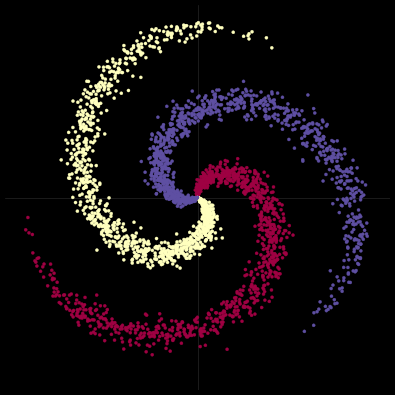

In [5]:
# visualise the data
plot_data(X, y)

### Linear Model

In [7]:
learning_rate = 1e-3
lambda_l2 = 1e-5

# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=learning_rate,
                            weight_decay=lambda_l2) # built-in L2

# Training
for t in range(1000):
    
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.861541, [ACCURACY]: 0.504


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


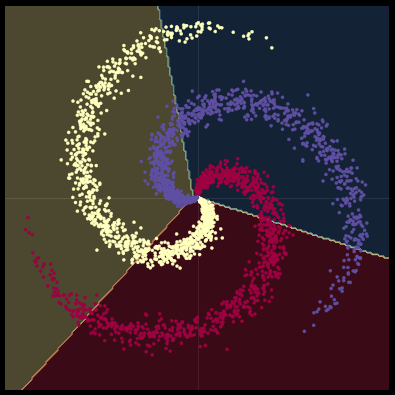

In [8]:
# Plot trained model
print(model)
plot_model(X, y, model)

### Two-layered network

In [10]:

#nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)

#nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

#we use the optim package to apply ADAM for our parameter updates
optimizer = torch.optim.Adam(model.parameters(), 
                            lr=learning_rate, 
                            weight_decay=lambda_l2) # built-in L2

#training 
for t in range(1000):
    
    #1. feedforward
    y_pred = model(X)

    #2. Compute loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    accuracy = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), accuracy))
    display.clear_output(wait=True)

    #3. clean gradients before running backward pass
    optimizer.zero_grad()

    #4. back propagation of gradients
    loss.backward()

    #5. update params
    optimizer.step()


[EPOCH]: 999, [LOSS]: 0.178408, [ACCURACY]: 0.949


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


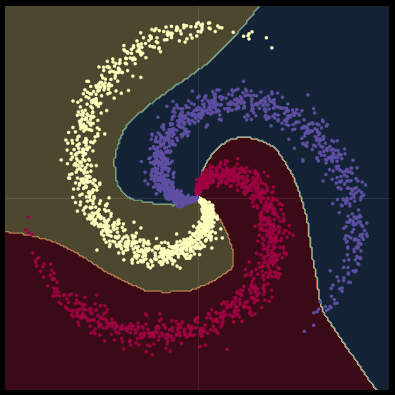

In [11]:
# Plot trained model
print(model)
plot_model(X, y, model)